In [5]:
from google.colab import files

# Upload files from your computer
uploaded = files.upload()

Saving Rick.pickle to Rick.pickle


In [6]:
import pickle

with open('Rick.pickle', 'rb') as file:
    data = pickle.load(file)

print(data)

                                 Open        High         Low       Close  \
Date                                                                        
2022-02-17 00:00:00-05:00  154.187493  154.855315  152.114248  152.453140   
2022-02-18 00:00:00-05:00  152.413269  153.180757  149.562559  150.868301   
2022-02-22 00:00:00-05:00  149.702101  150.300143  147.130481  147.608917   
2022-02-23 00:00:00-05:00  149.014346  149.253572  145.027340  145.396133   
2022-02-24 00:00:00-05:00  139.545215  149.084134  139.545215  148.914673   
...                               ...         ...         ...         ...   
2024-02-12 00:00:00-05:00  107.879997  111.059998  107.830002  109.290001   
2024-02-13 00:00:00-05:00  108.279999  110.650002  108.209999  110.459999   
2024-02-14 00:00:00-05:00  110.580002  111.680000  109.669998  111.559998   
2024-02-15 00:00:00-05:00  111.080002  112.919998  111.080002  112.449997   
2024-02-16 00:00:00-05:00  112.019997  112.559998  111.160004  111.599998   

In [7]:
import pandas as pd

data = pd.DataFrame(data)
data.describe()

,Open,High,Low,Close,Volume
count,502.000000,502.000000,502.000000,502.000000,5.010000e+02
mean,99.826219,101.003504,98.613673,138.813084,1.290093e+07
std,15.033235,15.250139,14.678095,624.452058,7.460270e+06
min,78.843041,79.530799,78.474245,-20.000000,5.426100e+06
25%,90.092497,90.995822,89.343816,90.181091,8.900900e+06
50%,96.002118,97.361360,94.801034,95.757915,1.125760e+07
75%,106.378302,107.644175,104.501919,106.261181,1.420600e+07
max,154.187493,154.855315,152.114248,9999.000000,7.027350e+07


In [8]:
import matplotlib.pyplot as plt
import numpy as np

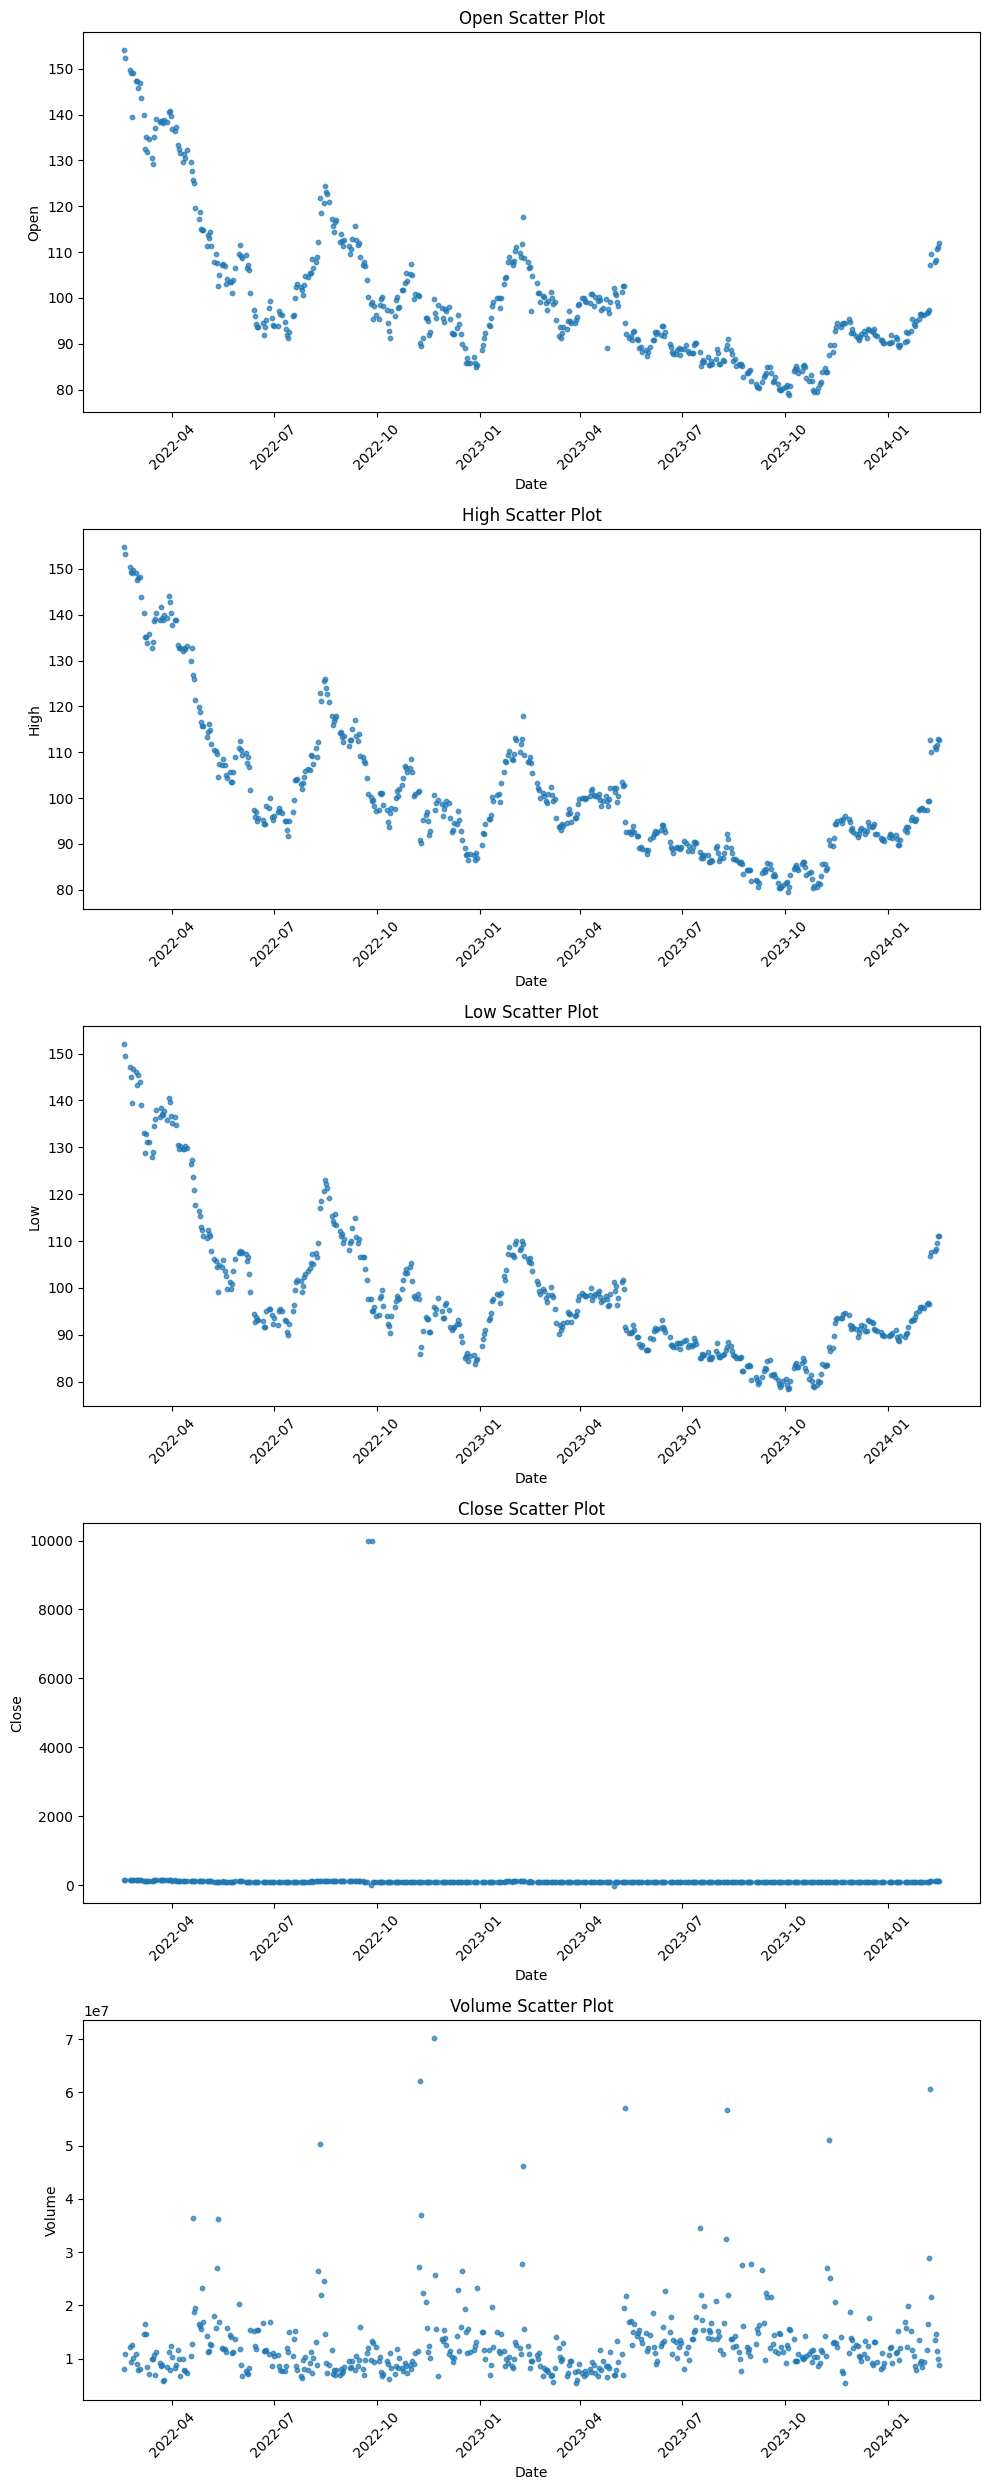

In [9]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 5 * len(numeric_cols)))

if len(numeric_cols) == 1:
    axes = [axes]

for i, col in enumerate(numeric_cols):
    axes[i].scatter(data.index, data[col], s=10, alpha=0.7)
    axes[i].set_title(f"{col} Scatter Plot")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
print(data.isna().sum())


Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64


In [11]:
col = 'Close'

Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

print(f"Column: {col}")
print(f"Number of outliers: {len(outliers)}")
if not outliers.empty:
    print(outliers[[col]])


Column: Close
Number of outliers: 22
                                 Close
Date                                  
2022-02-17 00:00:00-05:00   152.453140
2022-02-18 00:00:00-05:00   150.868301
2022-02-22 00:00:00-05:00   147.608917
2022-02-23 00:00:00-05:00   145.396133
2022-02-24 00:00:00-05:00   148.914673
2022-02-25 00:00:00-05:00   149.044250
2022-02-28 00:00:00-05:00   147.977737
2022-03-01 00:00:00-05:00   145.226685
2022-03-02 00:00:00-05:00   146.861359
2022-03-03 00:00:00-05:00   145.097122
2022-03-04 00:00:00-05:00   140.262863
2022-03-17 00:00:00-04:00   139.016937
2022-03-18 00:00:00-04:00   139.844238
2022-03-22 00:00:00-04:00   139.654846
2022-03-24 00:00:00-04:00   138.508591
2022-03-25 00:00:00-04:00   138.688004
2022-03-29 00:00:00-04:00   141.917480
2022-03-30 00:00:00-04:00   140.502090
2022-09-23 00:00:00-04:00  9999.000000
2022-09-26 00:00:00-04:00     0.000000
2022-09-27 00:00:00-04:00  9999.000000
2023-05-01 00:00:00-04:00   -20.000000


In [12]:
outlier_indices = [
    '2022-09-23 00:00:00-04:00',
    '2022-09-26 00:00:00-04:00',
    '2022-09-27 00:00:00-04:00',
    '2023-05-01 00:00:00-04:00'
]

data_no_outliers = data.copy()

# Set the 'Close' values at the outlier indices to NaN
data_no_outliers.loc[outlier_indices, 'Close'] = np.nan

# Compute a 20-day rolling mean for 'Close'
data_no_outliers['Close_rolling_20'] = (
    data_no_outliers['Close']
    .rolling(window=20, min_periods=1)
    .mean()
)

# Replace the outlier values with the corresponding rolling mean value
for idx in outlier_indices:
    data.loc[idx, 'Close'] = data_no_outliers.loc[idx, 'Close_rolling_20']

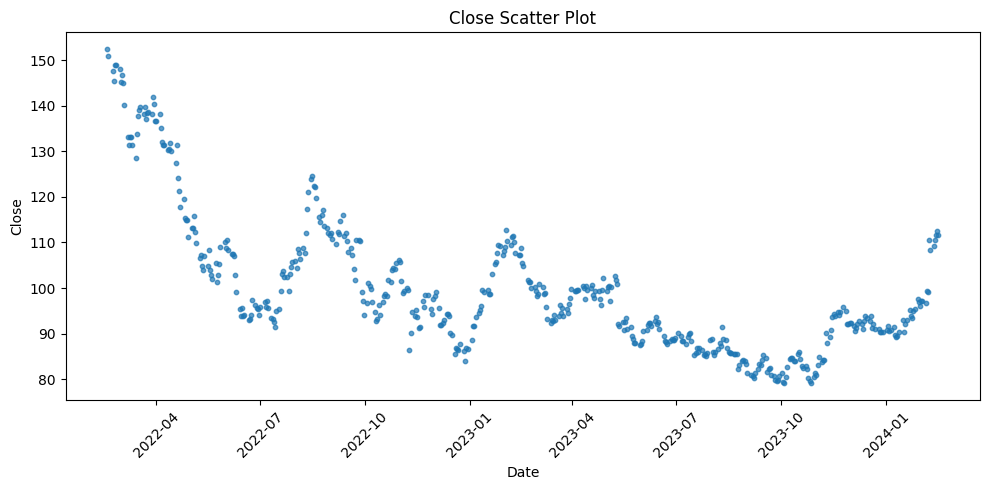

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(data.index, data['Close'], s=10, alpha=0.7)
plt.title('Close Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
outlier_indices = [
    '2022-09-23 00:00:00-04:00',
    '2022-09-26 00:00:00-04:00',
    '2022-09-27 00:00:00-04:00',
    '2023-05-01 00:00:00-04:00'
]

# Print the full rows from the DataFrame corresponding to the outlier indices
outlier_rows = data.loc[outlier_indices]
print(outlier_rows)

                                 Open        High         Low       Close  \
Date                                                                        
2022-09-23 00:00:00-04:00  100.293137  100.851316   97.701578  110.649382   
2022-09-26 00:00:00-04:00   98.628560  100.333012   97.741452  110.479935   
2022-09-27 00:00:00-04:00   99.206673   99.316317   95.119994  110.322214   
2023-05-01 00:00:00-04:00  102.077323  102.276670  101.279918   99.332581   

                               Volume  
Date                                   
2022-09-23 00:00:00-04:00  11976900.0  
2022-09-26 00:00:00-04:00   9760500.0  
2022-09-27 00:00:00-04:00  13360200.0  
2023-05-01 00:00:00-04:00   6909500.0  


In [15]:
#Step 1: Locate all rows with missing values in the 'Volume' column
missing_idx = data[data['Volume'].isna()].index

# Step 2: Print the relevant rows
print("Missing Volume rows:")
print(data.loc[missing_idx])

# Step 3: Create a temporary column with a 20-day rolling average for 'Volume'
data['Volume_roll_20'] = data['Volume'].rolling(window=20, min_periods=1).mean()

# Step 4: Replace NaN values in the original 'Volume' column with the corresponding rolling average
for idx in missing_idx:
    data.loc[idx, 'Volume'] = data.loc[idx, 'Volume_roll_20']

# If the temporary column is no longer needed, it can be removed
data.drop(columns=['Volume_roll_20'], inplace=True)

# Now the DataFrame 'data' is updated, and the rows with NaN in 'Volume' have been filled with the 20-day rolling average.
print(data.loc["2022-03-04 00:00:00-05:00"])
data.describe()


Missing Volume rows:
                                 Open        High         Low       Close  \
Date                                                                        
2022-03-04 00:00:00-05:00  143.542169  143.791357  139.096666  140.262863   

                           Volume  
Date                               
2022-03-04 00:00:00-05:00     NaN  
Open      1.435422e+02
High      1.437914e+02
Low       1.390967e+02
Close     1.402629e+02
Volume    9.872680e+06
Name: 2022-03-04 00:00:00-05:00, dtype: float64


,Open,High,Low,Close,Volume
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,99.826219,101.003504,98.613673,99.874407,1.289490e+07
std,15.033235,15.250139,14.678095,14.944169,7.454047e+06
min,78.843041,79.530799,78.474245,79.062325,5.426100e+06
25%,90.092497,90.995822,89.343816,90.227007,8.905675e+06
50%,96.002118,97.361360,94.801034,95.827690,1.125635e+07
75%,106.378302,107.644175,104.501919,106.545259,1.419472e+07
max,154.187493,154.855315,152.114248,152.453140,7.027350e+07


In [16]:

with open('fixed_data.pickle', 'wb') as file:
    # Save the data to a pickle file in binary write mode
    pickle.dump(data, file)

print("Data has been successfully saved to 'fixed_data.pickle'")

Data has been successfully saved to 'fixed_data.pickle'


In [17]:
##########################################
############part_2########################
#########################################

In [18]:
import yfinance as yf

# Tesla's symbol
symbol = "TSLA"

# Creating a Ticker object
ticker = yf.Ticker(symbol)

# Download data for the specified date range along with actions (dividends and splits)
data = ticker.history(
    start="2019-01-01",
    end="2020-11-01",
    actions=True
)

# Convert the index (date) to a regular column named "Date"
df = data.reset_index()

# Print a few sample rows
print(df.head())
print(df.columns)
print(df.tail())

                       Date       Open       High        Low      Close  \
0 2019-01-02 00:00:00-05:00  20.406668  21.008667  19.920000  20.674667   
1 2019-01-03 00:00:00-05:00  20.466667  20.626667  19.825333  20.024000   
2 2019-01-04 00:00:00-05:00  20.400000  21.200001  20.181999  21.179333   
3 2019-01-07 00:00:00-05:00  21.448000  22.449333  21.183332  22.330667   
4 2019-01-08 00:00:00-05:00  22.797333  22.934000  21.801332  22.356667   

      Volume  Dividends  Stock Splits  
0  174879000        0.0           0.0  
1  104478000        0.0           0.0  
2  110911500        0.0           0.0  
3  113268000        0.0           0.0  
4  105127500        0.0           0.0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
                         Date        Open        High         Low       Close  \
458 2020-10-26 00:00:00-04:00  137.210007  141.919998  136.666672  140.093338   
459 2020-10-27 00:00:00-04:00  

In [19]:
# 1) Sort rows so that the newest day is first
df = df.sort_values('Date', ascending=False).reset_index(drop=True)

# 2) Define the dividend impact ratio for day t:
#    DividendImpactRatio = 1 - (Dividends / Close)
df['DividendImpactRatio'] = 1 - (df['Dividends'] / df['Close'])

# 3) Daily multiplier: DailyFactor = DividendImpactRatio
df['DailyFactor'] = df['DividendImpactRatio']

# 4) Reverse cumulative product - define CumulativeFactor = cumprod(DailyFactor)
#    in order from newest to oldest
df['CumulativeFactor'] = df['DailyFactor'].cumprod()

# 5) Calculate Adjusted Close
df['Adj Close'] = df['Close'] * df['CumulativeFactor']

# 6) To adjust Open, High, and Low,
#    use the ratio: ratio_t = Adj Close_t / Close_t
df['AdjustmentRatio'] = df['Adj Close'] / df['Close']

df['Adj Open'] = df['Open'] * df['AdjustmentRatio']
df['Adj High'] = df['High'] * df['AdjustmentRatio']
df['Adj Low'] = df['Low'] * df['AdjustmentRatio']

# 7) Restore the original order (from oldest to newest)
df = df.sort_values('Date', ascending=True).reset_index(drop=True)

# Now, df contains the following columns:
# 'Adj Close', 'Adj Open', 'Adj High', 'Adj Low'
# which are adjusted for dividends only, without considering splits

# Display a few sample rows
print(df.head(5))
print(df.tail())

                       Date       Open       High        Low      Close  \
0 2019-01-02 00:00:00-05:00  20.406668  21.008667  19.920000  20.674667   
1 2019-01-03 00:00:00-05:00  20.466667  20.626667  19.825333  20.024000   
2 2019-01-04 00:00:00-05:00  20.400000  21.200001  20.181999  21.179333   
3 2019-01-07 00:00:00-05:00  21.448000  22.449333  21.183332  22.330667   
4 2019-01-08 00:00:00-05:00  22.797333  22.934000  21.801332  22.356667   

      Volume  Dividends  Stock Splits  DividendImpactRatio  DailyFactor  \
0  174879000        0.0           0.0                  1.0          1.0   
1  104478000        0.0           0.0                  1.0          1.0   
2  110911500        0.0           0.0                  1.0          1.0   
3  113268000        0.0           0.0                  1.0          1.0   
4  105127500        0.0           0.0                  1.0          1.0   

   CumulativeFactor  Adj Close  AdjustmentRatio   Adj Open   Adj High  \
0               1.0  20.6

In [20]:
has_dividends = (df['Dividends'] != 0).any()
print(has_dividends)


False
